### Description: Sparse Bayesian learning, accelerated method by Faul and Tipping
#### Assumptions: scalar input, scalar output

###### Author: Rimple Sandhu, Carleton University; Email: rimple_sandhu@outlook.com

In [1]:
#!/usr/bin/python
import numpy as np
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, math, sys

Assign polynomial basis (polyPower), hyper-parameters a,b,c,d and initial hyperparameter $\alpha$ and noise precision $\rho$:

In [2]:
polyPower = [0,1,2,3,4,5] # powers of polynomial basis
N = len(polyPower) # number of coefficients 
rho0 = 30 # initial error precision
alpha0 = [1e-03]*N # initial hyperparameter vector
Wlim = [-6,6]
Nsbl = 25
a=c=1.05
b=d=0.000001
SBLapproach = 2
mpl.rcParams.update({'font.size':14})

In [3]:
Yobs = np.loadtxt('Ydata.dat') 
Xobs = np.loadtxt('Xdata.dat')
M = len(Yobs)
Phi = np.zeros((M,N))
for i in range(0,M):
    for j in range(0,N):
        Phi[i,j] = Xobs[i]**polyPower[j]

In [4]:
def updatemPevid(alphai,rhoi):
    Ainv = np.diag(1/alphai)
    Bi = np.matmul(Phi,np.matmul(Ainv,np.transpose(Phi))) + np.identity(M)/rhoi
    Binvi = np.linalg.inv(Bi)
    Ki = np.matmul(Ainv,np.matmul(np.transpose(Phi),Binvi))
    Pi = Ainv - np.matmul(Ki,np.matmul(Phi,Ainv))
    mi = np.matmul(Ki,Yobs)
    evidi = st.multivariate_normal.pdf(Yobs,[0]*M,Bi)
    return mi, Pi, evidi, Binvi

In [12]:
Ngrid = 1000
Wpost = np.zeros((N,Ngrid))
Wprior = np.zeros((N,Ngrid))
Wgrid = np.zeros((N,Ngrid))
alpha = np.zeros((N,Nsbl))
gamma = np.zeros((N,Nsbl))
Wvar = np.zeros((N,Nsbl))
Wmu = np.zeros((N,Nsbl))
KLdis = np.zeros((N,Nsbl))
KLdist = np.zeros((N,Nsbl))
evid = [0]*Nsbl
gof = [0]*Nsbl
Pcond = [0]*Nsbl
rho = [0]*Nsbl
P = np.zeros((N,N))
alpha[:,0] = alpha0;
rho[0] = rho0;
curList = list(range(N))
for j in range(0,Nsbl-1):
    np.random.shuffle(curList)
    for i in range(0,N):
        Wmu[:,j],P,evid[j], Binv = updatemPevid(alpha[:,j],rho[j])
        Wvar[:,j] = np.diag(P)
        sbari = np.matmul(np.transpose(Phi[:,curList[i]]),np.matmul(Binv,Phi[:,curList[i]]))
        qbari = np.matmul(np.transpose(Phi[:,curList[i]]),np.matmul(Binv,Yobs))
        si = sbari/(1-sbari/alpha[curList[i],j])
        qi = qbari/(1-sbari/alpha[curList[i],j])
        if qi**2 > si:
            alpha[curList[i],j] = (si**2)/(qi**2-si)
            gamma[curList[i],j] = 1 - alpha[curList[i],j]*Wvar[curList[i],j]
            print('Try: ',curList[i],' ; Add/update')
        else:
            alpha[curList[i],j] = np.inf
            gamma[curList[i],j] = 0.0
            print('Try: ',curList[i],' ; remove/neglect')
        rho[j] = (M-np.sum(gamma[:,j]))/(np.power(np.linalg.norm(Yobs-np.matmul(Phi,Wmu[:,j])),2))
    gof[j] = st.multivariate_normal.pdf(Yobs,np.matmul(Phi,Wmu[:,j]),np.identity(M)/rho[j])
    alpha[:,j+1] = alpha[:,j]        
    rho[j+1] = rho[j]
    print(alpha[:,j],rho[j], np.log(evid[j]),np.log(gof[j]))

Try:  3  ; Add/update
Try:  4  ; remove/neglect
Try:  5  ; Add/update
Try:  1  ; Add/update
Try:  0  ; Add/update
Try:  2  ; Add/update
[9.96693120e-01 1.65412404e+01 1.38457205e+00 4.19731611e-03
            inf 2.53994994e+00] 29.015649763787085 34.64578079509384 50.617284167430995
Try:  0  ; Add/update
Try:  3  ; remove/neglect
Try:  5  ; remove/neglect
Try:  4  ; remove/neglect
Try:  2  ; Add/update
Try:  1  ; remove/neglect
[0.99889656        inf 0.893529          inf        inf        inf] 28.038529396811683 41.54138174065609 50.560606505782346
Try:  1  ; remove/neglect
Try:  4  ; remove/neglect
Try:  2  ; Add/update
Try:  3  ; remove/neglect
Try:  5  ; remove/neglect
Try:  0  ; Add/update
[1.02359521        inf 1.00043175        inf        inf        inf] 27.995985489471597 42.00216948566697 50.41721957685644
Try:  3  ; remove/neglect
Try:  4  ; remove/neglect
Try:  1  ; remove/neglect
Try:  5  ; remove/neglect
Try:  0  ; Add/update
Try:  2  ; Add/update
[1.02359994        inf 1

## Plotting for SBL iteration

/home/rimple/Softwares/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


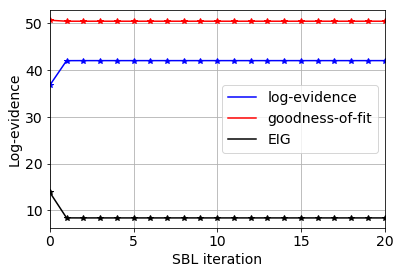

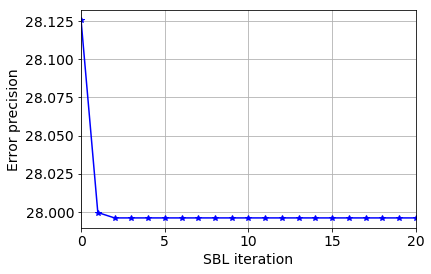

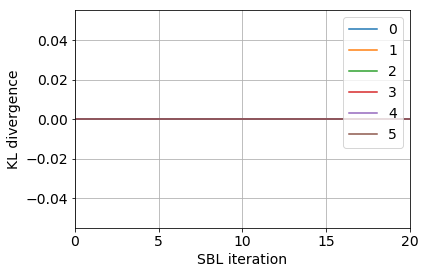

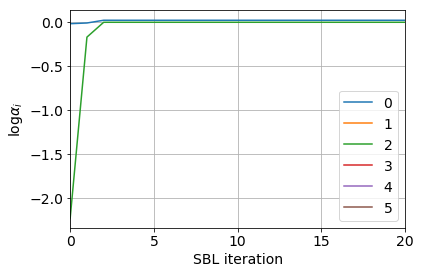

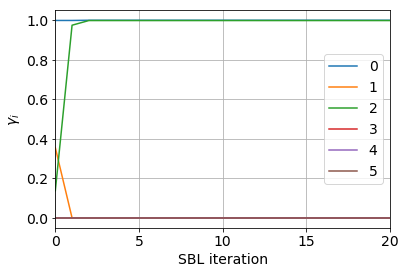

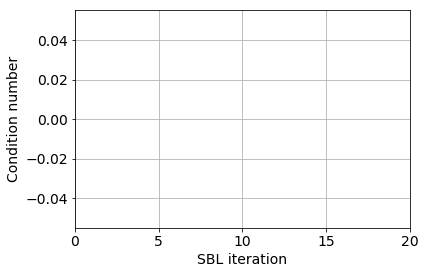

In [6]:
# plt.figure(1)
# plt.plot(np.log(evid[:-1]),'b*')
# plt.plot(np.log(evid[:-1]),'b-')
# plt.grid(True)
# plt.ylabel('Log-evidence')
# plt.xlabel('SBL iteration')
# plt.xlim([0,Nsbl-5])
# plt.savefig('SBL1_EVID.eps',bbox_inches='tight')
# plt.figure(2)
# plt.plot(np.log(gof[:-1]) - np.log(evid[:-1]),'b*')
# plt.plot(np.log(gof[:-1]) - np.log(evid[:-1]),'b-')
# plt.grid(True)
# plt.xlim([0,Nsbl-5])
# plt.ylabel('EIG')
# plt.xlabel('SBL iteration'); 
# plt.savefig('SBL1_EIG.eps',bbox_inches='tight')
# plt.figure(3)
# plt.plot(np.log(gof[:-1]),'b*')
# plt.plot(np.log(gof[:-1]),'b-')
# plt.grid(True)
# plt.xlim([0,Nsbl-5])
# plt.ylabel('Goodness-of-fit')
# plt.xlabel('SBL iteration');
# plt.savefig('SBL1_GOF.eps',bbox_inches='tight')
plt.figure(4)
plt.plot(np.log(evid[:-1]),'b*')
plt.plot(np.log(evid[:-1]),'b-',label='log-evidence')
plt.plot(np.log(gof[:-1]),'r*')
plt.plot(np.log(gof[:-1]),'r-',label='goodness-of-fit')
plt.plot(np.log(gof[:-1]) - np.log(evid[:-1]),'k*')
plt.plot(np.log(gof[:-1]) - np.log(evid[:-1]),'k-',label='EIG')
plt.grid(True)
plt.legend(loc='best', numpoints = 1);
plt.ylabel('Log-evidence')
plt.xlabel('SBL iteration')
plt.xlim([0,Nsbl-5])
plt.savefig('SBL1_EVIDALL.eps',bbox_inches='tight')
plt.figure(5)
plt.plot(rho[:-1],'b*')
plt.plot(rho[:-1],'b-')
plt.grid(True)
plt.xlim([0,Nsbl-5])
plt.ylabel('Error precision')
plt.xlabel('SBL iteration');
plt.savefig('SBL1_RHO.eps',bbox_inches='tight')
plt.figure(6)
for i in range(0,N):
    plt.plot(KLdist[i,:-1],label=str(i))
plt.grid(True)
plt.ylabel('KL divergence')
plt.xlabel('SBL iteration')
plt.xlim([0,Nsbl-5])
plt.legend(loc='best', numpoints = 1);
plt.savefig('SBL1_KLDIV.eps',bbox_inches='tight')
plt.figure(7)
for i in range(0,N):
    plt.plot(np.log(alpha[i,:-1]),label=str(i))
plt.grid(True)
plt.ylabel(r'$\log\alpha_i$')
plt.xlabel('SBL iteration')
plt.xlim([0,Nsbl-5])
plt.legend(loc='best', numpoints = 1);
plt.savefig('SBL1_ALPHA.eps',bbox_inches='tight')
plt.figure(8)
for i in range(0,N):
    plt.plot(gamma[i,:-1],label=str(i))
plt.grid(True)
plt.ylabel(r'$\gamma_i$')
plt.xlabel('SBL iteration')
plt.xlim([0,Nsbl-5])
plt.legend(loc='best', numpoints = 1);
plt.savefig('SBL1_GAMMA.eps',bbox_inches='tight')
plt.figure(91)
plt.plot(np.log(Pcond[:-1]))
plt.grid(True)
plt.ylabel('Condition number')
plt.xlabel('SBL iteration')
plt.xlim([0,Nsbl-5])
plt.savefig('SBL1_Pcond.eps',bbox_inches='tight')

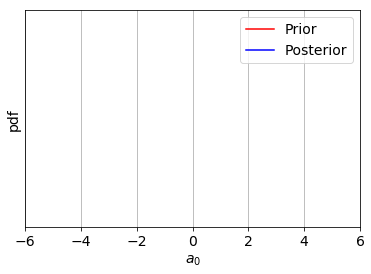

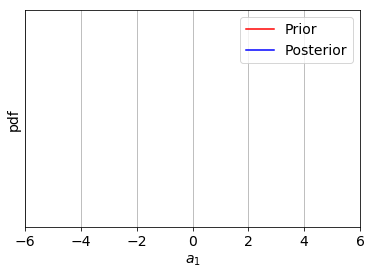

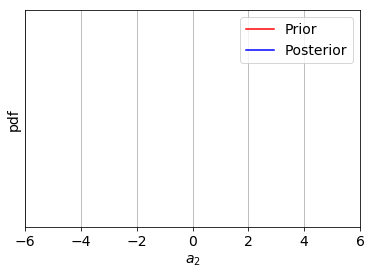

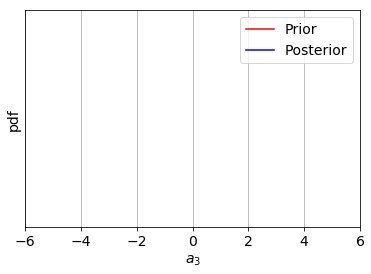

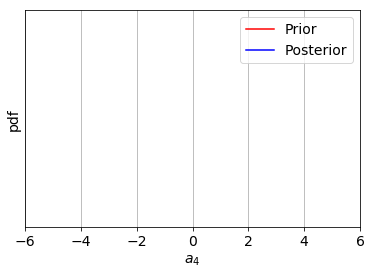

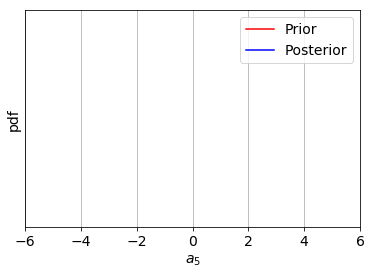

In [7]:
for i in range(0,N):
    fig = plt.figure(+i)
    plt.plot(Wgrid[i,:],Wprior[i,:],'r-',label='Prior')
    plt.plot(Wgrid[i,:],Wpost[i,:],'b-',label='Posterior')
    plt.yticks([])
    plt.grid(True)
    plt.xlabel(r'$a_'+str(i)+'$')
    plt.ylabel('pdf')
    #plt.xlim(Wrange[i,:])
    plt.xlim(Wlim[0],Wlim[1])
    plt.legend(loc='best', numpoints = 1)
    plt.savefig('SBL1_PDF_W'+str(i)+'.eps',bbox_inches='tight')

In [8]:
def fn(X):
    return np.polyval([1,0,1],X)
newbasis = [1,0,1,0,0,0]
Mnew = 100
Xrnge = [-2,2]
Yrnge = [-2,10]

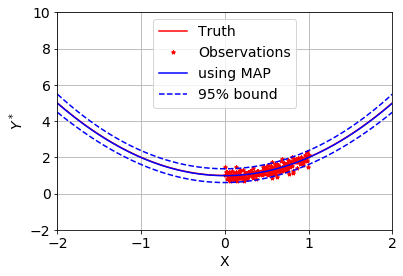

In [9]:
Xnew = np.linspace(Xrnge[0],Xrnge[1],Mnew)
PhiNew = np.zeros((Mnew,N))
for i in range(0,Mnew):
    for j in range(0,N):
        PhiNew[i,j] = newbasis[j]*Xnew[i]**polyPower[j]
PredVar = np.matmul(PhiNew,np.matmul(P,np.transpose(PhiNew))) + np.identity(Mnew)/rho[Nsbl-2]
PredMean = np.matmul(PhiNew,Wmu[:,Nsbl-2])
Ytrue = fn(Xnew)
fig = plt.figure(N+10)
plt.plot(Xnew,Ytrue,'r-',label='Truth')
plt.plot(Xobs,Yobs,'r*',label='Observations',markersize=4)
plt.plot(Xnew,PredMean,'b-',label='using MAP')
plt.plot(Xnew,PredMean+2*np.sqrt(np.diag(PredVar)),'b--',label='95% bound')
plt.plot(Xnew,PredMean-2*np.sqrt(np.diag(PredVar)),'b--')
plt.grid(True)
plt.ylabel(r'$Y^*$')
plt.xlabel('X')
plt.ylim(Yrnge)
plt.xlim([Xrnge[0],Xrnge[1]])
plt.legend(loc='best', numpoints = 1)
plt.savefig('SBL1_PRED.eps',bbox_inches='tight')
